# Play with the Dense Layer

In [46]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,Callback
import keras
from keras.callbacks import History 
history = History() # To save history of the model


In [4]:
configs = dict(
    hidden_units = 10,
)

In [5]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_redundant=0, n_informative=10, random_state=0, n_classes=10
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

### Simple MLP Model

In [7]:
def MLPModel():
    inputs = layers.Input(shape=(10,))
    x = layers.Dense(configs["hidden_units"], activation="relu")(inputs)
    outputs = layers.Dense(10, activation="softmax")(x)

    return models.Model(inputs, outputs)

### Num Hidden Units

In this section we will experiment with different values for hidden_units and see how it affects the final accuracy of the model.

In [44]:
num_units = [10, 100, 1000]
history_ = {}

In [ ]:
class BCP(keras.callbacks.Callback):
    batch_accuracy = [] # accuracy at given batch
    batch_loss = [] # loss at given batch    
    def __init__(self):
        super(BCP,self).__init__() 
    def on_train_batch_end(self, batch, logs=None):                
        BCP.batch_accuracy.append(logs.get('accuracy'))
        BCP.batch_loss.append(logs.get('loss'))

In [56]:
for units in num_units:
    configs["hidden_units"] = units
    print(configs)

    # Initialize the model and compile it
    tf.keras.backend.clear_session()
    model = MLPModel()
    model.summary()

    model.compile(
        "adam",
        "sparse_categorical_crossentropy",
        metrics=["acc"]
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=256,
        callbacks=[BCP()]
    )
    
    history_["Units " + str(units)] = history.history


{'hidden_units': 10}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220 (880.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.0722 - loss: 3.0889 - val_acc: 0.0715 - val_loss: 2.9356
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.0736 - loss: 2.8439 - val_acc: 0.0840 - val_loss: 2.7475
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.0893 - loss: 2.6976 - val_acc: 0.0983 - val_loss: 2.6040
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1052 - loss: 2.5564 - val_acc: 0.1155 - val_loss: 2.4931
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1140 - loss: 2.4520 - val_acc: 0.1310 - val_loss: 2.4056
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1377 - loss: 2.3666 - val_acc: 0.1433 - val_loss: 2.3350
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1543 - loss: 2.2887 - val_acc: 0.1562 - val_loss: 2.2771
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1745 - loss: 2.2492 - val_acc: 0.1760 - val_loss: 2.2271
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1954

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,110 (8.24 KB)

 Trainable params: 2,110 (8.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.1201 - loss: 2.5285 - val_acc: 0.2212 - val_loss: 2.1827
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2486 - loss: 2.1102 - val_acc: 0.3428 - val_loss: 1.9358
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3681 - loss: 1.8806 - val_acc: 0.4085 - val_loss: 1.7873
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4283 - loss: 1.7479 - val_acc: 0.4475 - val_loss: 1.6848
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4614 - loss: 1.6450 - val_acc: 0.4827 - val_loss: 1.6042
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4993 - loss: 1.5714 - val_acc: 0.5058 - val_loss: 1.5355
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5148 - loss: 1.5124 - val_acc: 0.5297 - val_loss: 1.4754
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5436 - loss: 1.4262 - val_acc: 0.5490 - val_loss: 1.4204
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5521

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,010 (82.07 KB)

 Trainable params: 21,010 (82.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.2602 - loss: 2.1029 - val_acc: 0.4575 - val_loss: 1.6606
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4668 - loss: 1.6053 - val_acc: 0.5440 - val_loss: 1.4395
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5618 - loss: 1.3851 - val_acc: 0.6087 - val_loss: 1.2826
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6287 - loss: 1.2250 - val_acc: 0.6365 - val_loss: 1.1756
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6656 - loss: 1.1079 - val_acc: 0.6612 - val_loss: 1.0943
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6884 - loss: 1.0445 - val_acc: 0.6715 - val_loss: 1.0353
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7028 - loss: 0.9664 - val_acc: 0.6812 - val_loss: 0.9934
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7228 - loss: 0.9170 - val_acc: 0.6855 - val_loss: 0.9620
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.724

### Effect of Parameters - units

The first argument in the Dense layer is units that can control the number of neurons in that layer. The number of units will be 10, 100 or 1000. The panels below show the result of using different units.

Clearly, by **increasing** the number of parameters (units) improve the model.


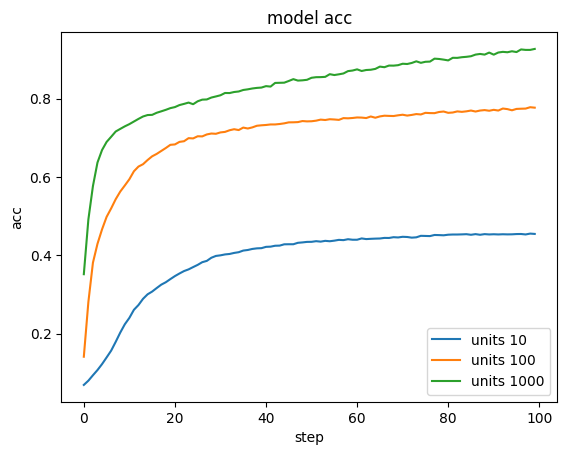

In [58]:
plt.plot(history_['Units 10']['acc'])
plt.plot(history_['Units 100']['acc'])
plt.plot(history_['Units 1000']['acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('step')
plt.legend(['units 10', 'units 100','units 1000'])
plt.show()

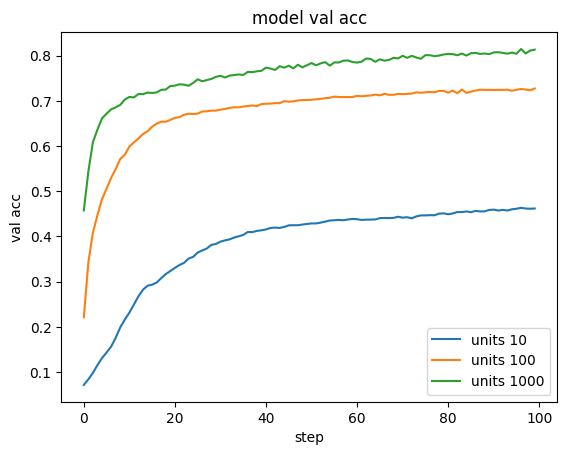

In [59]:
plt.plot(history_['Units 10']['val_acc'])
plt.plot(history_['Units 100']['val_acc'])
plt.plot(history_['Units 1000']['val_acc'])
plt.title('model val acc')
plt.ylabel('val acc')
plt.xlabel('step')
plt.legend(['units 10', 'units 100','units 1000'])
plt.show()

If you look at the training and validation loss, the one with 1000 units starts to overfit quickly, while the one with only 10 neurons has not even started to diverge

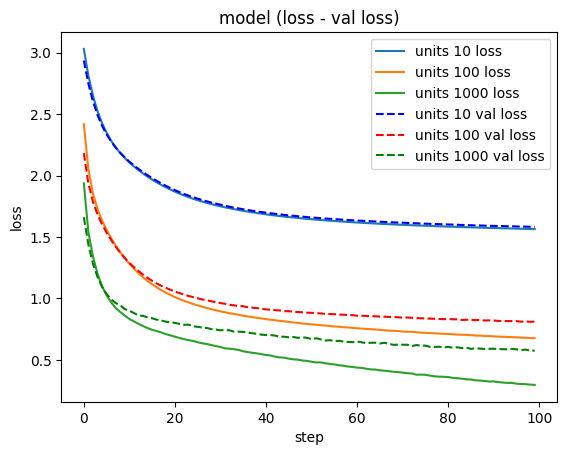

In [64]:
plt.plot(history_['Units 10']['loss'])
plt.plot(history_['Units 100']['loss'])
plt.plot(history_['Units 1000']['loss'])
plt.plot(history_['Units 10']['val_loss'],'b--')
plt.plot(history_['Units 100']['val_loss'],'r--')
plt.plot(history_['Units 1000']['val_loss'],'g--')
plt.title('model (loss - val loss)')
plt.ylabel('loss')
plt.xlabel('step')
plt.legend(['units 10 loss', 'units 100 loss','units 1000 loss','units 10 val loss', 'units 100 val loss','units 1000 val loss'])
plt.show()

### Effect of Kernel Regularization
Can we counter this overfitting without lowering the capacity of the model? Enters kernel regularization, allowing you to apply layer parameter penalties during optimization. We will not go into the details and try to see the effect in action. 

We will compare the model trained with 1000 hidden units without any regularization with models trained with the same configuration but with kernel_regularization. We will use the L2 regularization penalty, which takes an l2 argument. It's a float value in the [0-1] range. **A value close to 0 means no regularization**.

In the previous section, we noticed that the model trained without regularization started overfitting soon. Let's see the effect of different L2 values and regularization in general. We're going to experiment with different degree of regularization.


In [65]:
configs = dict(
    hidden_units = 1000,
    regularizer = 1e-2,
    use_regularizer = False
)

In [66]:
def MLPModelwithReg():
    inputs = layers.Input(shape=(10,))
    x = layers.Dense(
        configs["hidden_units"],
        activation="relu",
        kernel_regularizer=regularizers.L2(configs["regularizer"]) if configs["use_regularizer"] else None,
    )(inputs)
    outputs = layers.Dense(10, activation="softmax")(x)

    return models.Model(inputs, outputs)

In [69]:
regularizations = [False, 1e-1, 1e-2, 1e-3]
history_reg = {}

In [70]:
for regularization in regularizations:
    if regularization is False:
        configs["use_regularizer"] = False
    else:
        configs["use_regularizer"] = True
        configs["regularizer"] = regularization
    print(configs)

    # Initialize the model and compile it
    tf.keras.backend.clear_session()
    model = MLPModelwithReg()
    model.summary()

    model.compile(
        "adam",
        "sparse_categorical_crossentropy",
        metrics=["acc"]
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=256,
        callbacks=[BCP()]
    )

    # Evaluate
    eval_loss, eval_acc = model.evaluate(X_test, y_test)
    history.history['val_acc'] = eval_acc
    history_reg["Reg " + str(regularization)] = history.history


{'hidden_units': 1000, 'regularizer': 0.001, 'use_regularizer': False}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,010 (82.07 KB)

 Trainable params: 21,010 (82.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2945 - loss: 2.0514 - val_acc: 0.4498 - val_loss: 1.6395
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4812 - loss: 1.5653 - val_acc: 0.5485 - val_loss: 1.4203
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5875 - loss: 1.3483 - val_acc: 0.6177 - val_loss: 1.2648
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6329 - loss: 1.2160 - val_acc: 0.6405 - val_loss: 1.1619
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6724 - loss: 1.0942 - val_acc: 0.6585 - val_loss: 1.0880
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6838 - loss: 1.0296 - val_acc: 0.6735 - val_loss: 1.0298
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7143 - loss: 0.9567 - val_acc: 0.6850 - val_loss: 0.9894
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7210 - loss: 0.9212 - val_acc: 0.6870 - val_loss: 0.9593
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7219

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,010 (82.07 KB)

 Trainable params: 21,010 (82.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2781 - loss: 3.7765 - val_acc: 0.4232 - val_loss: 2.6795
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4425 - loss: 2.4836 - val_acc: 0.4630 - val_loss: 2.1058
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4754 - loss: 2.0273 - val_acc: 0.4672 - val_loss: 1.9060
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4821 - loss: 1.8712 - val_acc: 0.4725 - val_loss: 1.8288
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4898 - loss: 1.8092 - val_acc: 0.4942 - val_loss: 1.7813
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4867 - loss: 1.7586 - val_acc: 0.5058 - val_loss: 1.7459
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5319 - loss: 1.7100 - val_acc: 0.5230 - val_loss: 1.7106
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5358 - loss: 1.6993 - val_acc: 0.5472 - val_loss: 1.6762
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5561

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,010 (82.07 KB)

 Trainable params: 21,010 (82.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.2541 - loss: 2.3021 - val_acc: 0.4495 - val_loss: 1.8601
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4743 - loss: 1.7838 - val_acc: 0.5332 - val_loss: 1.6523
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5565 - loss: 1.6000 - val_acc: 0.5950 - val_loss: 1.5241
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6214 - loss: 1.4786 - val_acc: 0.6225 - val_loss: 1.4295
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6390 - loss: 1.3897 - val_acc: 0.6435 - val_loss: 1.3664
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6614 - loss: 1.3233 - val_acc: 0.6575 - val_loss: 1.3177
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6839 - loss: 1.2560 - val_acc: 0.6628 - val_loss: 1.2837
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7037 - loss: 1.2171 - val_acc: 0.6745 - val_loss: 1.2488
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7100

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,010 (82.07 KB)

 Trainable params: 21,010 (82.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.2831 - loss: 2.0794 - val_acc: 0.4535 - val_loss: 1.6676
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4866 - loss: 1.5858 - val_acc: 0.5505 - val_loss: 1.4467
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5827 - loss: 1.3701 - val_acc: 0.6060 - val_loss: 1.3006
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6348 - loss: 1.2407 - val_acc: 0.6357 - val_loss: 1.1967
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6628 - loss: 1.1572 - val_acc: 0.6557 - val_loss: 1.1306
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6803 - loss: 1.0793 - val_acc: 0.6697 - val_loss: 1.0790
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7033 - loss: 1.0058 - val_acc: 0.6830 - val_loss: 1.0406
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7172 - loss: 0.9706 - val_acc: 0.6883 - val_loss: 1.0137
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7178

In [71]:
history_reg

{'Reg False': {'acc': [0.37183332443237305,
   0.5021666884422302,
   0.5913333296775818,
   0.6380000114440918,
   0.6693333387374878,
   0.6863333582878113,
   0.7058333158493042,
   0.7153333425521851,
   0.7246666550636292,
   0.7298333048820496,
   0.7429999709129333,
   0.7404999732971191,
   0.7465000152587891,
   0.749833345413208,
   0.7581666707992554,
   0.7586666941642761,
   0.7668333053588867,
   0.765666663646698,
   0.7730000019073486,
   0.7751666903495789,
   0.7806666493415833,
   0.7806666493415833,
   0.7826666831970215,
   0.7891666889190674,
   0.7925000190734863,
   0.7943333387374878,
   0.7973333597183228,
   0.8009999990463257,
   0.8023333549499512,
   0.8051666617393494,
   0.8071666955947876,
   0.8131666779518127,
   0.8173333406448364,
   0.815666675567627,
   0.8151666522026062,
   0.8218333125114441,
   0.8246666789054871,
   0.8233333230018616,
   0.8316666483879089,
   0.8308333158493042,
   0.8320000171661377,
   0.8373333215713501,
   0.83733332157

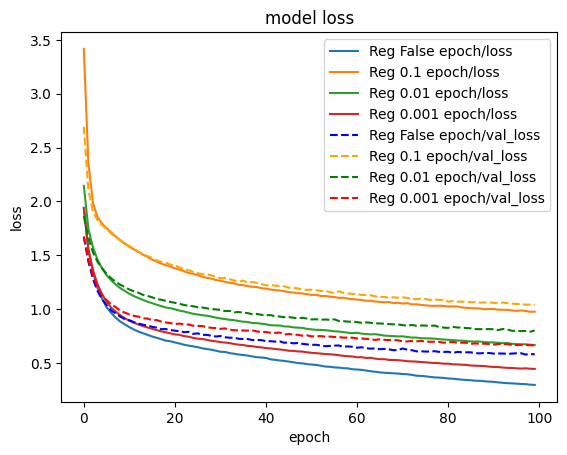

In [82]:
plt.plot(history_['Reg False']['loss'])
plt.plot(history_['Reg 0.1']['loss'])
plt.plot(history_['Reg 0.01']['loss'])
plt.plot(history_['Reg 0.001']['loss'])
plt.plot(history_['Reg False']['val_loss'],'b--')
plt.plot(history_['Reg 0.1']['val_loss'],'--', color='orange')
plt.plot(history_['Reg 0.01']['val_loss'],'g--')
plt.plot(history_['Reg 0.001']['val_loss'],'r--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Reg False epoch/loss', 'Reg 0.1 epoch/loss','Reg 0.01 epoch/loss', 'Reg 0.001 epoch/loss','Reg False epoch/val_loss', 'Reg 0.1 epoch/val_loss','Reg 0.01 epoch/val_loss', 'Reg 0.001 epoch/val_loss'])
plt.show()

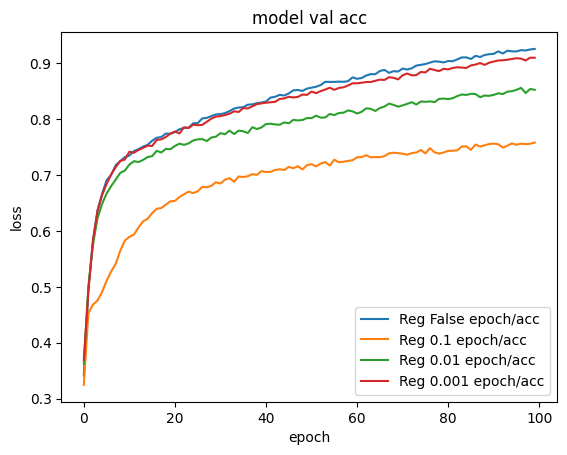

In [81]:
plt.plot(history_['Reg False']['acc'])
plt.plot(history_['Reg 0.1']['acc'])
plt.plot(history_['Reg 0.01']['acc'])
plt.plot(history_['Reg 0.001']['acc'])
plt.title('model val acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Reg False epoch/acc', 'Reg 0.1 epoch/acc','Reg 0.01 epoch/acc', 'Reg 0.001 epoch/acc'])
plt.show()